# Importance sampling

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from vmc.interface import PyHarmonicOscillator, PyMetropolisAlgorithm, \
    PySimpleGaussian, PySampler, PyImportanceMetropolis
from vmc import run_experiment

from IPython.core.pylabtools import figsize
from IPython.core.display import display

In [2]:
sns.set(color_codes=True)

In [3]:
mass = 1.0
omega = 1.0
diffusion_coefficient = 0.5

step_length = 2.0
time_step = 0.5

In [4]:
alpha_min = 0.1
alpha_max = 0.9
num_alphas = 17

parameter_names = ["alpha"]

alphas = np.linspace(alpha_min, alpha_max, num_alphas).reshape(num_alphas, 1)

In [5]:
num_particles = 10
num_dimensions = 3
num_samples = int(1e5)

num_thermalization_steps = 0
num_local_energies = 0

kwargs = {
    "num_samples": num_samples, "step_length": step_length,
    "num_thermalization_steps": num_thermalization_steps
}

In [6]:
wavefunction_importance = PySimpleGaussian(
    num_particles, num_dimensions, mass, omega, spread=step_length)
sampler_importance = PySampler(
    wavefunction_importance, PyHarmonicOscillator(),
    PyImportanceMetropolis(time_step, diffusion_coefficient), num_local_energies)

In [7]:
df_importance = run_experiment(
    sampler_importance, wavefunction_importance, alphas,
    parameter_names, **kwargs)

100%|██████████| 17/17 [00:00<00:00, 17.76it/s]


In [8]:
wavefunction = PySimpleGaussian(
    num_particles, num_dimensions, mass, omega, spread=step_length)
sampler = PySampler(
    wavefunction, PyHarmonicOscillator(),
    PyMetropolisAlgorithm(), num_local_energies)

In [9]:
df = run_experiment(
    sampler, wavefunction, alphas,
    parameter_names, **kwargs)

100%|██████████| 17/17 [00:00<00:00, 35.32it/s]


In [10]:
display(df_importance)

,alpha,energy,variance,acceptance
0,0.10,38.949778,85.660586,0.98593
1,0.15,27.258008,34.524375,0.97415
2,0.20,21.858803,16.699254,0.95941
3,0.25,18.693307,8.250357,0.94389
4,0.30,16.908337,4.105630,0.92558
5,0.35,15.953147,1.881227,0.90721
6,0.40,15.361016,0.759607,0.88540
7,0.45,15.076483,0.166181,0.86562
8,0.50,15.000000,0.000000,0.84186
9,0.55,15.076812,0.141765,0.81880


In [11]:
display(df)

,alpha,energy,variance,acceptance
0,0.10,39.039238,85.700123,0.54991
1,0.15,27.121911,33.941712,0.46812
2,0.20,21.490006,15.580477,0.40400
3,0.25,18.550999,8.369661,0.35241
4,0.30,16.934347,3.933680,0.31286
5,0.35,15.961554,1.988376,0.27954
6,0.40,15.408198,0.766022,0.25185
7,0.45,15.077682,0.162521,0.22597
8,0.50,15.000000,0.000000,0.20821
9,0.55,15.048025,0.155559,0.18952


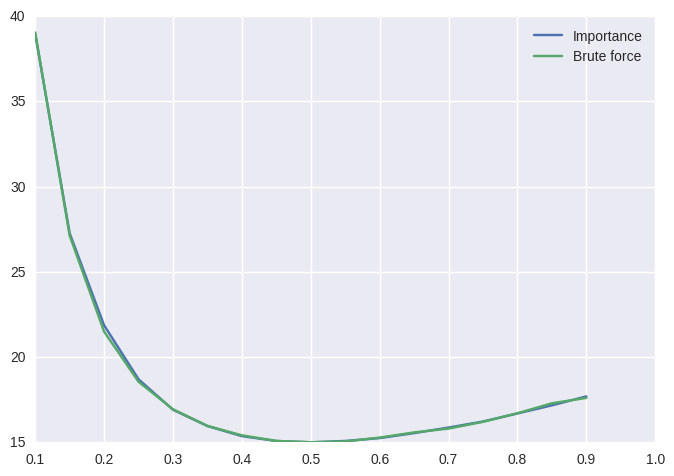

In [12]:
plt.plot(
    df_importance["alpha"], df_importance["energy"],
    label="Importance"
)
plt.plot(
    df["alpha"], df["energy"],
    label="Brute force"
)
plt.legend(loc="best")
plt.show()